In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

#Micro Project

**SIFT**

SIFT (Scale Invariant Feature Transform) Detector is used in the detection of interest points on an input image. It allows the identification of localized features in images which is essential in applications such as:

*   Object Recognition in Images
*   Path detection and obstacle avoidance algorithms
*   Gesture recognition, Mosaic generation



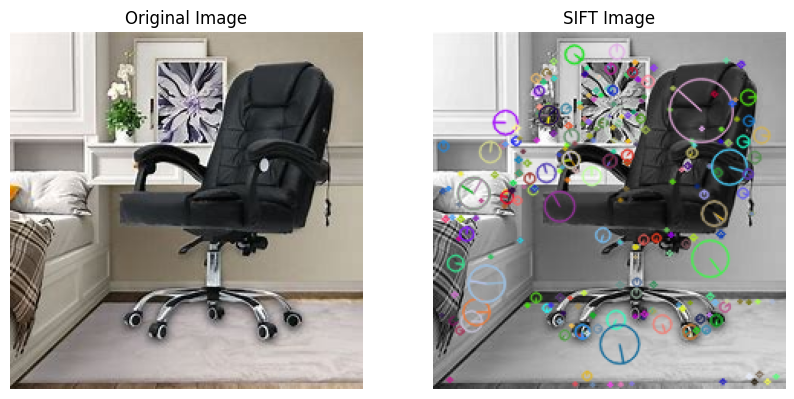

In [ ]:
img = cv2.imread('OIP.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Applying SIFT detector
sift = cv2.SIFT_create()
kp = sift.detect(gray, None)

# Drawing the keypoints
sift_img = cv2.drawKeypoints(gray, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].axis("off")
axs[0].set_title("Original Image")
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

axs[1].axis("off")
axs[1].set_title("SIFT Image")
axs[1].imshow(cv2.cvtColor(sift_img, cv2.COLOR_BGR2RGB))

plt.show()

**Canny Edge Detector**

The Canny edge detection algorithm is a multi-step process used to detect a wide range of edges in images. Here are the key steps involved in the Canny edge detection method:

1. **Noise Reduction:**
   - The algorithm begins by reducing noise in the image using a Gaussian filter to smooth out the image. This step helps in suppressing noise and small irrelevant details.

2. **Gradient Calculation:**
   - It calculates the gradient magnitude and direction for each pixel using edge detection operators like Sobel, Prewitt, or Roberts operators.

3. **Non-maximum Suppression:**
   - It involves scanning the gradient magnitude image and only keeping the local maxima as the potential edge pixels.

4. **Double Thresholding:**
   - This stage involves applying two thresholds (a high threshold and a low threshold) to classify the edge pixels as strong, weak, or non-relevant. Pixels above the high threshold are marked as strong edge pixels, while those below the low threshold are discarded.
   - Pixels between the two thresholds are marked as weak edge pixels.

5. **Edge Tracking by Hysteresis:**
   - This step helps to extend and connect the edges to obtain continuous, complete edges.

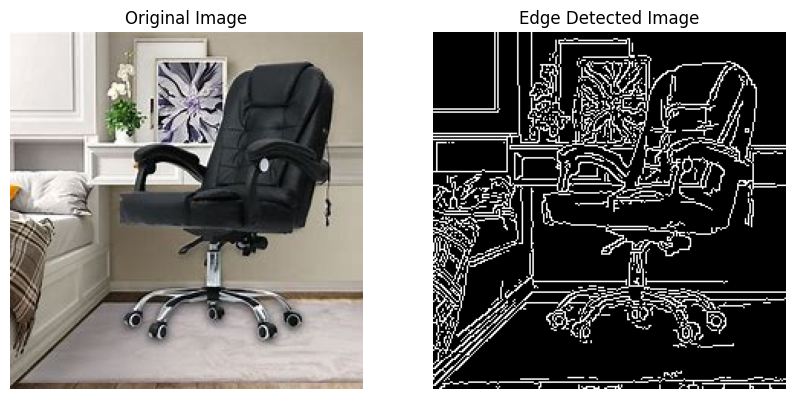

In [ ]:
img = cv2.imread("OIP.jpg")  # Read image

# Setting parameter values
t_lower = 50  # Lower Threshold
t_upper = 150  # Upper threshold

# Applying the Canny Edge filter
edge = cv2.Canny(img, t_lower, t_upper, apertureSize=3)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].axis("off")
axs[0].set_title("Original Image")
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

axs[1].axis("off")
axs[1].set_title("Edge Detected Image")
axs[1].imshow(edge, cmap='gray')

plt.show()

#Macro

Point clouds are a collection of data points in a three-dimensional coordinate system. Each point in the point cloud represents a specific position in space and is defined by its x, y, and z coordinates, often accompanied by additional information such as color, intensity, or other attributes.

In [ ]:
def read_off(file_path):
  with open(file_path, 'r') as file:
      if 'OFF' != file.readline().strip():
          raise('Not a valid OFF header')
      n_verts, n_faces, __ = tuple([int(s) for s in file.readline().strip().split(' ')])
      verts = np.array([[float(s) for s in file.readline().strip().split(' ')] for i_vert in range(n_verts)])
      faces = np.array([[int(s) for s in file.readline().strip().split(' ')][1:] for i_face in range(n_faces)])
      return verts, faces

In [ ]:
def visualize_mesh(mesh):
  import plotly.graph_objs as go
  # Create a 3D mesh plot
  verts, faces = mesh
  mesh = go.Mesh3d(x = verts[:, 0], y = verts[:, 1], z = verts[:, 2],
                  i = faces[:, 0], j = faces[:, 1], k = faces[:, 2], opacity=0.5)
  layout = go.Layout(scene=dict(aspectmode="data"))
  fig = go.Figure(data=[mesh], layout=layout)
  fig.show()

In [ ]:
file_path = r"/content/sofa.off"
mesh = read_off(file_path)
visualize_mesh(mesh)

In [ ]:
def visualize_pointcloud(pointcloud):
  import plotly.graph_objects as go
  pointcloud = go.Scatter3d(x = pointcloud[:, 0], y = pointcloud[:, 1], z = pointcloud[:, 2],
                            mode='markers', marker=dict(size= 3, opacity=0.5))
  layout = go.Layout(scene=dict(aspectmode="data"))
  fig = go.Figure(data=[pointcloud], layout = layout)
  fig.show()

In [ ]:
file_path = r"/content/sofa.off"
mesh = read_off(file_path)
pcd = mesh[0]
visualize_pointcloud(pcd)

In [ ]:
def mesh_to_pointcloud(mesh, n):
  import random

  def triangle_area(pt1, pt2, pt3):
      side_a = np.linalg.norm(pt1 - pt2)
      side_b = np.linalg.norm(pt2 - pt3)
      side_c = np.linalg.norm(pt3 - pt1)
      s = 0.5 * ( side_a + side_b + side_c)
      return max(s * (s - side_a) * (s - side_b) * (s - side_c), 0)**0.5

  def sample_point(pt1, pt2, pt3):
      # barycentric coordinates on a triangle
      s, t = sorted([random.random(), random.random()])
      f = lambda i: s * pt1[i] + (t-s) * pt2[i] + (1-t) * pt3[i]
      return (f(0), f(1), f(2))

  verts, faces = mesh
  areas = np.zeros((len(faces)))
  for i in range(len(areas)):
      areas[i] = (triangle_area(verts[faces[i][0]], verts[faces[i][1]], verts[faces[i][2]]))

  sampled_faces = (random.choices(faces, weights=areas, k = n))
  pointcloud = np.zeros((n, 3))
  for i in range(len(sampled_faces)):
      pointcloud[i] = (sample_point(verts[sampled_faces[i][0]], verts[sampled_faces[i][1]], verts[sampled_faces[i][2]]))

  return pointcloud

In [ ]:
file_path = "/content/sofa.off"
mesh = read_off(file_path)
pcd = mesh_to_pointcloud(mesh, 50000)
visualize_pointcloud(pcd)

#Mini

The process involves dividing the 3D space into a grid of voxels (3D pixels) and aggregating the points that fall within each voxel. This results in a reduced set of points representing the original structure of the point cloud.

The steps for voxel grid downsampling are as follows:

1. **Defining Voxel Size:**
   - Choose the size of the voxel. This determines the granularity of the grid. A smaller voxel size retains more details but may increase computational complexity.

2. **Voxel Grid Creation:**
   - Partition the 3D space into equally sized cubic voxels based on the chosen voxel size.

3. **Point Cloud Partitioning:**
   - For each point in the original point cloud, determine the voxel it belongs to by its 3D coordinates. Assign the point to the corresponding voxel.

4. **Downsampling:**
   - For each voxel in the grid, decide how to represent the points contained within it. Common approaches including centroid and random sampling.

5. **Generate Downsampled Point Cloud:**
   - Once each voxel has been processed, the chosen representative points from each voxel form the downsampled point cloud.


In [ ]:
!pip install open3d

In [ ]:
import open3d as o3d

mesh = o3d.io.read_triangle_mesh("sofa.off")
point_cloud = mesh.sample_points_poisson_disk(number_of_points=10000)

# Downsample the point cloud using Voxel Grid Downsampling
voxel_size = 0.01
downsampled = point_cloud.voxel_down_sample(voxel_size)
pcd = np.asarray(downsampled.points)

In [ ]:
visualize_pointcloud(pcd)